In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Display columns with missing values and their counts
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    df[col] = df[col].fillna(df[col].median())

In [7]:
# Fill specific columns with their median values
df.fillna({'LotFrontage': df['LotFrontage'].median(),
           'MasVnrArea': df['MasVnrArea'].median(),
           'GarageYrBlt': df['GarageYrBlt'].median()}, inplace=True)


In [9]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Neighborhood', 'HouseStyle'], drop_first=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encode ordinal categorical variables
ordinal_cols = ['ExterQual', 'BsmtQual', 'KitchenQual']
for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['LotArea', 'GrLivArea', 'TotalBsmtSF']

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
# Create a new feature for total bathrooms
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath'])
# Create a new feature for the age of the house
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

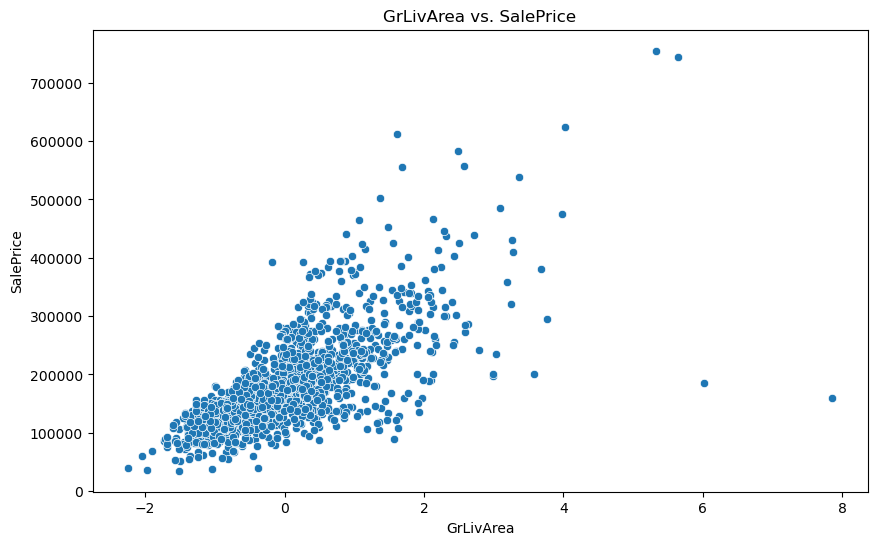

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize potential outliers in 'GrLivArea' vs. 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs. SalePrice')
plt.show()

# Remove outliers based on domain knowledge
df = df[df['GrLivArea'] < 4000]

In [35]:
# List all columns that are of type 'object' (categorical)
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Apply one-hot encoding to all categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [37]:
# Apply one-hot encoding to test_df using the same columns as the training set
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

# Align test_df columns with X columns by reindexing (fill missing columns with 0)
test_df = test_df.reindex(columns=X.columns, fill_value=0)

NameError: name 'test_df' is not defined

In [39]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv('test.csv')


In [41]:
# Assume `categorical_columns` is the list of categorical columns from the training set
# Use the same encoding approach as the training set
categorical_columns = ['Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual']  # Example; replace with actual columns used in training

# Convert categorical columns in the test set
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

# Align test_df columns with the training data X columns by reindexing (fill missing columns with 0)
test_df = test_df.reindex(columns=X.columns, fill_value=0)


In [45]:
# Identify categorical columns in the training dataset
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Apply one-hot encoding to all categorical columns
X = pd.get_dummies(df.drop('SalePrice', axis=1), columns=categorical_columns, drop_first=True)
y = df['SalePrice']


Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [47]:
# Apply one-hot encoding to all categorical columns in the training set
X = pd.get_dummies(df.drop('SalePrice', axis=1), columns=categorical_columns, drop_first=True)
y = df['SalePrice']


In [49]:
# Load and preprocess test dataset
test_df = pd.read_csv('test.csv')

# Apply one-hot encoding to the test dataset
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

# Align test_df columns with X columns from the training data
test_df = test_df.reindex(columns=X.columns, fill_value=0)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")


Validation RMSE: 49028.24803246817


In [55]:
# Check for any remaining categorical columns in test_df
categorical_columns_test = test_df.select_dtypes(include=['object']).columns
print("Categorical columns in test data:", categorical_columns_test)


Categorical columns in test data: Index(['ExterQual', 'BsmtQual', 'KitchenQual'], dtype='object')


In [57]:
# One-hot encode the remaining categorical columns in test_df
if len(categorical_columns_test) > 0:
    test_df = pd.get_dummies(test_df, columns=categorical_columns_test, drop_first=True)


In [59]:
# Align columns with X from the training data, filling any missing columns with 0
test_df = test_df.reindex(columns=X.columns, fill_value=0)


In [63]:
# Check for missing values in test_df
missing_values = test_df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values in test_df:\n", missing_columns)


Columns with missing values in test_df:
 LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [65]:
# Fill missing values in numerical columns with the median
for col in missing_columns.index:
    if test_df[col].dtype in ['float64', 'int64']:
        test_df[col].fillna(test_df[col].median(), inplace=True)
    else:
        # For categorical columns, fill with mode
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)


/var/folders/g4/b67smz453zg5gbtsn76ln30r0000gn/T/ipykernel_59833/2148279971.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].median(), inplace=True)


In [67]:
# Make predictions on the test data
test_predictions = model.predict(test_df)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    "Id": test_df.index,  # Ensure the "Id" column is present if required
    "SalePrice": test_predictions
})

# Save the submission file
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv
